**Schritt 1:**

$x_{1} = x_{0} + h = 0 + 0.7 = 0.7$

$y_{1} = y_{0} + \frac{h}2 (f(x_{0}, y_{0}) + f(x_{1}, y_{1})) = 2 + \frac{0.7}2 (0.0 + 0.24499999999999997) = 2.08575$

Absoluter Fehler: 0.057368050431986894

**Schritt 2:**

$x_{2} = x_{1} + h = 0.7 + 0.7 = 1.4$

$y_{2} = y_{1} + \frac{h}2 (f(x_{1}, y_{1}) + f(x_{2}, y_{2})) = 2.08575 + \frac{0.7}2 (0.2349274841184226 + 0.8710339805167809) = 2.472836512622321$

Absoluter Fehler: 0.25593176350325564


All x values: 0.0, 0.7, 1.4
All y values: 2.0, 2.08575, 2.472836512622321
All absolute errors: 0.0, 0.057368050431986894, 0.25593176350325564


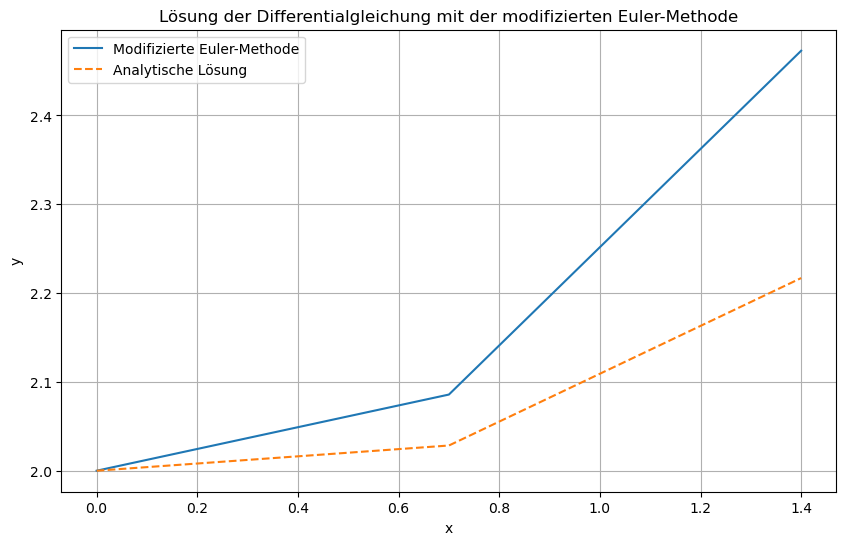

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

def mod_euler(f, a, b, n, y0):
    h = (b - a) / n
    x = a
    y = y0

    X = np.zeros(n + 1)
    Y = np.zeros(n + 1)
    E = np.zeros(n + 1)

    X[0] = x
    Y[0] = y
    E[0] = 0

    for i in range(1, n + 1):
        x1 = x + h
        y1e = y + h * f(x, y)
        k1 = f(x, y)

        k2 = f(x1, y1e)
        y1 = y + h * (k1 + k2) / 2

        X[i] = x1
        Y[i] = y1

        Yres = np.sqrt((x1**3) / 3 + 4)
        E[i] = np.abs(Yres - y1)

        display(Markdown(f"**Schritt {i}:**"))
        display(Markdown(f"$x_{{{i}}} = x_{{{i-1}}} + h = {x} + {h} = {x1}$"))
        display(Markdown(f"$y_{{{i}}} = y_{{{i-1}}} + \\frac{{h}}{2} (f(x_{{{i-1}}}, y_{{{i-1}}}) + f(x_{{{i}}}, y_{{{i}}})) = {y} + \\frac{{{h}}}{2} ({k1} + {k2}) = {y1}$"))
        display(Markdown(f"Absoluter Fehler: {E[i]}"))
        print()

        x = x1
        y = y1

    return X, Y

def f(x, y):
    return (x**2 / y)

a = 0
b = 1.4
n = 2
y0 = 2

X, Y = mod_euler(f, a, b, n, y0)
print("All x values:", ', '.join(map(str, X.flatten().tolist())))
print("All y values:", ', '.join(map(str, Y.flatten().tolist())))

# Berechnung des absoluten Fehlers
h = (b - a) / n
Xres = np.arange(a, b + h, h)
Yres = np.sqrt((Xres**3) / 3 + 4)
abs_error = np.abs(Yres - Y)

print("All absolute errors: " + ', '.join(map(str, abs_error.flatten().tolist())))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='Modifizierte Euler-Methode')
plt.plot(Xres, Yres, label='Analytische Lösung', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lösung der Differentialgleichung mit der modifizierten Euler-Methode')
plt.legend()
plt.grid(True)
plt.show()